<a href="https://colab.research.google.com/github/JoyceKurita/term_deposit/blob/main/Parte_II_ML_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte II - Machine Learning**

Conhecer seus clientes é fundamental para direcionar campanhas de marketing mais eficazes. E é através dos dados que podemos conhecê-los melhor. Assim, sabemos qual o perfil do cliente mais propenso a adquirir certo tipo de produto.

Como dito anteriormente, para esse projeto de Data Science seguiremos as seguintes etapas:

1. Obtenção dos dados
2. Análise Exploratória e Visualização dos dados
3. **Pré-processamento**
4. **Modelos de Machine Learning**
5. **Avaliação do modelo**

Nesta seção, exploraremos as etapas **3, 4** e **5** descritas acima, e iremos preparar os dados e implementar um modelo de machine learning para prever quais clientes abrem um *term deposit*.

Utilizaremos o Google Colab, editor de python em nuvem.


**Importando as bibliotecas**

A primeiro passo é importar as primeiras bibliotecas que serão utilizadas nesta fase do projeto: 


*   Pandas - Análise e manipulação de dados;
*   Numpy - Aplica funções matemáticas em arrays e matrizes multidimensionais;
*   Matplotlib e Seaborn - Visualização de dados.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importando e lendo os arquivos**

O conjunto de dados está armazenado em um repositório do GitHub, iremos importá-lo ao Google Colab e realizar a verificação inicial.

In [ ]:
# leitura do conjunto de dados
treino = pd.read_csv('https://raw.githubusercontent.com/JoyceKurita/term_deposit/main/files/treino.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/JoyceKurita/term_deposit/main/files/teste.csv')

Relembrando as variáveis do conjunto de dados:

*   **Unnamed: 0:** índice (numérica);
*   **age:** idade (numérica);
*   **job:** tipo de emprego (categórica: ‘admin.’, ‘blue collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’);
*   **marital:** estado civil (categórica: ‘divorced’,‘married’,‘single’);
*   **education:** grau de instrução (categórica:‘primary’,‘secondary’,‘tertiary’);
*   **default:** é adimplente? (categórica: ‘no’,‘yes’);
*   **housing:** tem casa própria? (categórica: ‘no’,‘yes’);
*   **loan:** tem empréstimo? (categórica: ‘no’,‘yes’);
*   **balance:** saldo em conta (numérica);
*   **contact:** tipo de comunicação (categórica: ‘cellular’,‘telephone’);
*   **month:** mês do último contato (categórica: ‘jan’, ‘feb’, ‘mar’, ., ‘nov’, ‘dec’);
*   **day:** dia do último contato (numérica);
*   **campaign:** número de contatos da última campanha (numérica);
*   **pdays:** número de dias do último contato em campanha anterior (numérica);
*   **previous:** número de contatos anteriores (numérica);
*   **poutcome:** resultado da campanha anterior (categórica: ‘failure’,‘other’,‘success’);
*   **term_deposit** o cliente abriu um *term deposit*? (categórica: ‘yes’,‘no’) - **Variável Resposta**

Visualizando as cinco primeiras linhas dos conjuntos de dados:

In [ ]:
treino.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


In [ ]:
teste.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,0,29,blue-collar,single,secondary,no,348,yes,no,unknown,9,may,2,-1,0,unknown
1,1,39,blue-collar,single,secondary,no,116,yes,no,unknown,26,may,3,-1,0,unknown
2,2,34,management,married,tertiary,no,16649,yes,no,cellular,20,nov,2,-1,0,unknown
3,3,31,admin.,single,secondary,no,358,yes,no,unknown,15,may,2,-1,0,unknown
4,4,40,entrepreneur,married,tertiary,no,-164,no,no,cellular,7,may,1,-1,0,unknown


## **Pré-processamento dos dados**

Nesta etapa realizaremos transformações em algumas variáveis para que possamos utilizá-las nos modelos de Machine Learning.

*   Verificação de valores nulos;
*   Transformações nas variáveis numéricas;
*   Transformações nas variáveis categóricas;
*   Separação dos conjuntos de dados para o a aplicação dos modelos;
*   *Dumificação* das variáveis categóricas;
*   Seleção das variáveis.



**Verificação dos valores nulos**

Dados faltantes é uma ocorrência comum em dados reais, e podem ocorrer por vários motivos, como a omissão no momento de preencher os dados, a inexistência de uma dada variável para uma linha de dados, entre outros. 

Nesta etapa, iremos analizar se o conjunto de dados possui valores nulos, utilizando o comando *isnull*:


In [ ]:
treino.isnull().sum()

Unnamed: 0      0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [ ]:
teste.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
dtype: int64

Felizmente, nosso conjunto de dados não possui valores nulos não necessitando, portanto, do tratamento de dados faltantes.

**Transformação das variáveis numéricas**

Iremos aplicar as seguintes transformações nas variáveis numéricas:

*   **Discretização das variáveis** - A discretização é o processo de transformação de variáveis contínuas em discretas (neste caso, em categorias). Iremos discretizar as variáveis *age, balance, day, campaign, pdays* e *previous*;



In [ ]:
treino['idade'] = pd.cut(treino['age'], bins=[0, 29, 39, 49, 59, 100], labels=['> 18-29', '30-39', '40-49', '50-59', '> 59'])
teste['idade'] = pd.cut(teste['age'], bins=[0, 29, 39, 49, 59, 100], labels=['> 18-29', '30-39', '40-49', '50-59', '> 59'])

treino['saldo'] = pd.cut(treino['balance'], bins=[-10000, 2000, 15000, 100000], labels=['>= 2k', '< 2k a 15k', '< 15k'])
teste['saldo'] = pd.cut(teste['balance'], bins=[-10000, 2000, 15000, 100000], labels=['>= 2k', '< 2k a 15k', '< 15k'])

treino['dia'] = pd.cut(treino['day'], bins=[0, 5, 10, 15, 20, 25, 35], labels=['1 a 5', '6 a 10', '11 a 15', '16 a 20', '21 a 25', '25 a 31'])
teste['dia'] = pd.cut(teste['day'], bins=[0, 5, 10, 15, 20, 25, 35], labels=['1 a 5', '6 a 10', '11 a 15', '16 a 20', '21 a 25', '25 a 31'])

treino['campanha'] = pd.cut(treino['campaign'], bins=[0, 1, 4, 50], labels=['1', '2-4', '> 5'])
teste['campanha'] = pd.cut(teste['campaign'], bins=[0, 1, 4, 50], labels=['1', '2-4', '> 5'])

treino['pdias'] = pd.cut(treino['pdays'], bins=[-100, -1, 200, 1000], labels=['-1', '0-200', '> 200'])
teste['pdias'] = pd.cut(teste['pdays'], bins=[-100, -1, 200, 1000], labels=['-1', '0-200', '> 200'])

treino['anterior'] = pd.cut(treino['previous'], bins=[-100, 0, 10, 100], labels=['0', '1-10', '> 10'])
teste['anterior'] = pd.cut(teste['previous'], bins=[-100, 0, 10, 100], labels=['0', '1-10', '> 10'])

*   **Normalização das variáveis** - As variáveis *age* e *balance* possuem escalas diferentes, o que pode deixar o algoritimo enviesado. Iremos normalizá-las, isto é, deixar as variáveis com valores dentro de um intervalo menor. Utilizaremos o módulo *standardscaler*, da bilbioteca *scikit-learn*.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
aux0 = sc.fit_transform(treino['age'].values.reshape(-1, 1))
aux1 = pd.DataFrame(aux0, columns=['age_n'])
treino = pd.concat([treino, aux1], axis=1)

aux0 = sc.fit_transform(teste['age'].values.reshape(-1, 1))
aux1 = pd.DataFrame(aux0, columns=['age_n'])
teste = pd.concat([teste, aux1], axis=1)

In [ ]:
aux0 = sc.fit_transform(treino['balance'].values.reshape(-1, 1))
aux1 = pd.DataFrame(aux0, columns=['balance_n'])
treino = pd.concat([treino, aux1], axis=1)

aux0 = sc.fit_transform(teste['balance'].values.reshape(-1, 1))
aux1 = pd.DataFrame(aux0, columns=['balance_n'])
teste = pd.concat([teste, aux1], axis=1)

In [ ]:
treino.drop(['age', 'balance'], axis=1, inplace=True)
teste.drop(['age', 'balance'], axis=1, inplace=True)

Verificando os conjuntos de dados após as trasnformações das variáveis numéricas:


In [ ]:
treino.sample(3)

,Unnamed: 0,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit,idade,saldo,dia,campanha,pdias,anterior,age_n,balance_n
249,249,technician,married,tertiary,no,no,no,cellular,25,jul,4,-1,0,unknown,yes,30-39,>= 2k,21 a 25,2-4,-1,0,-0.521720,0.023971
4097,4097,technician,married,unknown,no,no,no,cellular,30,apr,1,-1,0,unknown,yes,40-49,>= 2k,25 a 31,1,-1,0,0.097302,0.002334
5926,5926,admin.,married,secondary,no,no,no,cellular,7,aug,4,-1,0,unknown,yes,40-49,< 2k a 15k,6 a 10,2-4,-1,0,0.539461,0.469389


In [ ]:
teste.sample(3)

,Unnamed: 0,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,idade,saldo,dia,campanha,pdias,anterior,age_n,balance_n
1364,1364,retired,divorced,primary,no,no,no,telephone,21,oct,1,-1,0,unknown,> 59,< 2k a 15k,21 a 25,1,-1,0,4.113596,1.708013
17,17,technician,married,secondary,no,yes,no,unknown,13,may,2,-1,0,unknown,40-49,< 2k a 15k,11 a 15,2-4,-1,0,0.645809,0.902986
1293,1293,student,single,secondary,no,no,no,telephone,12,aug,1,-1,0,unknown,> 18-29,>= 2k,11 a 15,1,-1,0,-1.754966,-0.440996


**Transformação das variáveis categóricas**

Iremos aplicar as seguintes transformações nas variáveis categóricas:

*   **Mapear as variáveis binárias** - Iremos utilizar a função *map* para transformar as variáveis  *default, housing, loan*, e a variável resposta *term deposit* do tipo ***yes/no*** para ***0/1***;

In [ ]:
treino['term_deposit'] = treino['term_deposit'].map({'yes' : 1, 'no' : 0})

treino['default'] = treino['default'].map({'yes' : 1, 'no' : 0})
teste['default'] = teste['default'].map({'yes' : 1, 'no' : 0})

treino['housing'] = treino['housing'].map({'yes' : 1, 'no' : 0})
teste['housing'] = teste['housing'].map({'yes' : 1, 'no' : 0})

treino['loan'] = treino['loan'].map({'yes' : 1, 'no' : 0})
teste['loan'] = teste['loan'].map({'yes' : 1, 'no' : 0})

*   **Transformação de variável categórica em numérica** - Iremos utilizar a função *map* para transformar a variável *month*;

In [ ]:
treino['month'] = treino['month'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})
teste['month'] = teste['month'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})

*   **Recategorização** - As variáveis *month* e *job* serão recategorizadas;

In [ ]:
treino['mes'] = pd.cut(treino['month'], bins=[0, 4, 8, 13], labels=['1quad', '2quad', '3quad'])
teste['mes'] = pd.cut(teste['month'], bins=[0, 4, 8, 13], labels=['1quad', '2quad', '3quad'])

treino['emprego'] = treino['job'].map({'management': 'niv_sup', 'blue-collar': 'niv_medio', 'technician': 'niv_medio', 'admin.': 'niv_sup', 'services': 'niv_medio', 'retired': 'aposentado', 'self-employed': 'outros', 'unemployed': 'outros', 'entrepreneur': 'outros', 'student': 'estudante', 'housemaid': 'outros', 'unknown': 'outros'})
teste['emprego'] = teste['job'].map({'management': 'niv_sup', 'blue-collar': 'niv_medio', 'technician': 'niv_medio', 'admin.': 'niv_sup', 'services': 'niv_medio', 'retired': 'aposentado', 'self-employed': 'outros', 'unemployed': 'outros', 'entrepreneur': 'outros', 'student': 'estudante', 'housemaid': 'outros', 'unknown': 'outros'})


Verificando os conjuntos de dados após as transformações das variáveis categóricas:

In [ ]:
treino.sample(3)

,Unnamed: 0,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit,idade,saldo,dia,campanha,pdias,anterior,age_n,balance_n,mes,emprego
1781,1781,admin.,single,tertiary,0,1,0,cellular,18,5,7,-1,0,unknown,0,30-39,>= 2k,16 a 20,> 5,-1,0,-0.787015,-0.200746,2quad,niv_sup
2440,2440,blue-collar,married,secondary,0,1,0,cellular,12,5,2,-1,0,unknown,0,40-49,>= 2k,11 a 15,2-4,-1,0,0.627892,-0.317278,2quad,niv_medio
451,451,management,married,tertiary,0,0,0,cellular,19,11,2,-1,0,unknown,1,40-49,< 2k a 15k,16 a 20,2-4,-1,0,0.097302,0.668142,3quad,niv_sup


In [ ]:
teste.sample(3)

,Unnamed: 0,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,idade,saldo,dia,campanha,pdias,anterior,age_n,balance_n,mes,emprego
125,125,management,married,tertiary,0,0,1,cellular,22,8,2,-1,0,unknown,50-59,>= 2k,21 a 25,2-4,-1,0,1.090398,-0.470523,2quad,niv_sup
624,624,blue-collar,divorced,secondary,0,1,0,cellular,7,5,1,335,5,other,30-39,>= 2k,6 a 10,1,> 200,1-10,-0.954707,-0.386159,2quad,niv_medio
96,96,blue-collar,married,secondary,0,1,0,unknown,21,5,2,-1,0,unknown,30-39,>= 2k,21 a 25,2-4,-1,0,-0.865790,-0.178494,2quad,niv_medio


**Separação dos conjuntos de dados para o a aplicação dos modelos**

Nesta etapa, primeiramente, iremos separar a variável resposta. 

Em seguida, dividiremos o conjunto de dados em três, ao mesmo tempo que removeremos a variável *Unnamed: 0*, que não possui relevância para o desenvolvimento do modelo, trata-se apenas de uma sequência numérica de itens. Dessa forma, os modelos de Machine Learning serão testados nos três conjuntos com configurações distintas, a fim de que seja encontrada a melhor métrica em um dos três conjuntos.

In [ ]:
# separando a variável resposta do conjunto de dados
y = treino['term_deposit']
y

0       1
1       0
2       0
3       0
4       1
       ..
6495    1
6496    0
6497    0
6498    1
6499    1
Name: term_deposit, Length: 6500, dtype: int64

In [ ]:
treino1 = treino.drop(['Unnamed: 0','age_n', 'balance_n', 'day', 'month', 'job', 'campaign', 'pdays', 'previous', 'term_deposit'], axis=1)
teste1 = teste.drop(['Unnamed: 0', 'age_n', 'balance_n', 'day', 'month', 'job', 'campaign', 'pdays', 'previous'], axis=1)

In [ ]:
treino1.sample(3)

,marital,education,default,housing,loan,contact,poutcome,idade,saldo,dia,campanha,pdias,anterior,mes,emprego
5797,single,secondary,0,1,0,cellular,success,40-49,>= 2k,11 a 15,1,> 200,1-10,2quad,niv_sup
3630,married,secondary,0,1,1,cellular,failure,30-39,>= 2k,1 a 5,1,> 200,1-10,1quad,niv_medio
2834,divorced,secondary,0,1,0,cellular,unknown,30-39,< 2k a 15k,11 a 15,1,-1,0,2quad,outros


In [ ]:
teste1.sample(3)

,marital,education,default,housing,loan,contact,poutcome,idade,saldo,dia,campanha,pdias,anterior,mes,emprego
1102,single,secondary,0,0,0,cellular,unknown,> 18-29,>= 2k,25 a 31,1,-1,0,1quad,estudante
1257,single,tertiary,0,0,0,cellular,unknown,30-39,< 2k a 15k,16 a 20,2-4,-1,0,2quad,niv_sup
77,divorced,secondary,0,1,0,unknown,unknown,50-59,>= 2k,25 a 31,2-4,-1,0,2quad,niv_medio


In [ ]:
treino2 = treino.drop(['Unnamed: 0', 'saldo', 'idade', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior', 'term_deposit'], axis=1)
teste2 = teste.drop(['Unnamed: 0', 'saldo', 'idade', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior'], axis=1)

In [ ]:
treino2.sample(3)

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,age_n,balance_n
6248,admin.,single,secondary,0,1,0,cellular,29,1,1,241,4,failure,-1.052310,0.376040
5909,admin.,single,secondary,0,1,0,cellular,18,5,2,350,2,failure,-0.079561,0.151013
3352,services,married,secondary,0,0,0,cellular,28,8,1,-1,0,unknown,0.981619,0.028917


In [ ]:
teste2.sample(3)

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,age_n,balance_n
1289,retired,divorced,tertiary,0,0,0,cellular,10,8,1,185,2,success,1.623903,0.636591
632,admin.,married,secondary,0,1,0,cellular,18,11,5,-1,0,unknown,0.379057,-0.480906
378,entrepreneur,single,tertiary,0,1,0,cellular,17,4,2,73,1,failure,-0.510119,-0.060709


In [ ]:
treino3 = treino.drop(['Unnamed: 0', 'idade', 'saldo', 'day', 'month', 'job', 'campaign', 'pdays', 'previous', 'term_deposit'], axis=1)
teste3 = teste.drop(['Unnamed: 0', 'idade', 'saldo', 'day', 'month', 'job', 'campaign', 'pdays', 'previous'], axis=1)

In [ ]:
treino3.sample(3)

,marital,education,default,housing,loan,contact,poutcome,dia,campanha,pdias,anterior,age_n,balance_n,mes,emprego
4522,married,tertiary,0,0,0,cellular,unknown,21 a 25,2-4,-1,0,1.512209,-0.479557,2quad,aposentado
1367,married,primary,0,1,1,telephone,failure,6 a 10,2-4,> 200,1-10,0.716324,-0.333042,1quad,niv_medio
5620,single,tertiary,0,0,0,cellular,unknown,16 a 20,2-4,-1,0,-1.317605,0.665360,2quad,niv_sup


In [ ]:
teste3.sample(3)

,marital,education,default,housing,loan,contact,poutcome,dia,campanha,pdias,anterior,age_n,balance_n,mes,emprego
23,married,tertiary,0,1,0,cellular,success,6 a 10,1,0-200,> 10,-0.332284,-0.480906,2quad,niv_sup
1144,married,tertiary,0,1,0,cellular,unknown,6 a 10,1,-1,0,0.734727,-0.055517,2quad,niv_sup
88,married,tertiary,0,0,0,cellular,unknown,6 a 10,> 5,-1,0,0.112304,-0.337812,2quad,niv_sup


***Dumificação* das variáveis categóricas**

*Dumificação* é o procedimento de transformação de variáveis categóricas em binárias, geralmente utilizado quando a variável possui 3 ou mais categorias.

Este método consiste na criação de novas colunas de variáveis, cujos valores atribuidos serão binários, ou seja, **0** ou **1**.

Tomemos como exemplo a variável *contact*. Os valores atribuídos a essa coluna são: *cellular, telephone* e *unknown*. Aplicando a *dumificação*, a coluna da variável *contact* será substituída por três colunas, *contact_cellular, contact_telephone* e *contact_unknown*, que assumirão valores binários.

Este método é utilizado, pois alguns algoritimos de Machine Learning não aceitam variáveis categóricas. 

In [ ]:
treino1 = pd.get_dummies(treino1, columns=['marital', 'education', 'contact', 'poutcome', 'saldo', 'idade', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior'], drop_first=True)
teste1 = pd.get_dummies(teste1, columns=['marital', 'education', 'contact', 'poutcome', 'saldo', 'idade', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior'], drop_first=True)

In [ ]:
print(treino1.shape, teste1.shape)

(6500, 36) (1422, 36)


In [ ]:
treino1.sample(3)

,default,housing,loan,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,saldo_< 2k a 15k,saldo_< 15k,idade_30-39,idade_40-49,idade_50-59,idade_> 59,dia_6 a 10,dia_11 a 15,dia_16 a 20,dia_21 a 25,dia_25 a 31,mes_2quad,mes_3quad,emprego_estudante,emprego_niv_medio,emprego_niv_sup,emprego_outros,campanha_2-4,campanha_> 5,pdias_0-200,pdias_> 200,anterior_1-10,anterior_> 10
5120,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
132,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
5121,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
teste1.sample(3)

,default,housing,loan,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,saldo_< 2k a 15k,saldo_< 15k,idade_30-39,idade_40-49,idade_50-59,idade_> 59,dia_6 a 10,dia_11 a 15,dia_16 a 20,dia_21 a 25,dia_25 a 31,mes_2quad,mes_3quad,emprego_estudante,emprego_niv_medio,emprego_niv_sup,emprego_outros,campanha_2-4,campanha_> 5,pdias_0-200,pdias_> 200,anterior_1-10,anterior_> 10
664,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
875,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
840,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
treino2 = pd.get_dummies(treino2, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)
teste2 = pd.get_dummies(teste2, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

In [ ]:
print(treino2.shape, teste2.shape)

(6500, 31) (1422, 31)


In [ ]:
treino2.sample(3)

,default,housing,loan,day,month,campaign,pdays,previous,age_n,balance_n,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
4766,0,1,0,9,5,1,-1,0,-0.521720,-0.380335,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
276,0,1,0,20,6,8,-1,0,-0.787015,0.301237,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
4472,0,1,1,20,4,1,152,1,0.185734,-0.397336,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
teste2.sample(3)

,default,housing,loan,day,month,campaign,pdays,previous,age_n,balance_n,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
334,0,0,0,30,7,4,-1,0,1.090398,-0.030208,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1276,0,1,0,8,7,1,-1,0,0.467974,-0.181739,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1298,0,0,0,14,8,1,-1,0,-1.310378,-0.307311,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [ ]:
treino3 = pd.get_dummies(treino3, columns=['marital', 'education', 'contact', 'poutcome', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior'], drop_first=True)
teste3 = pd.get_dummies(teste3, columns=['marital', 'education', 'contact', 'poutcome', 'dia', 'mes', 'emprego', 'campanha', 'pdias', 'anterior'], drop_first=True)

In [ ]:
print(treino3.shape, teste3.shape)

(6500, 32) (1422, 32)


In [ ]:
treino3.sample(3)

,default,housing,loan,age_n,balance_n,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,dia_6 a 10,dia_11 a 15,dia_16 a 20,dia_21 a 25,dia_25 a 31,mes_2quad,mes_3quad,emprego_estudante,emprego_niv_medio,emprego_niv_sup,emprego_outros,campanha_2-4,campanha_> 5,pdias_0-200,pdias_> 200,anterior_1-10,anterior_> 10
3923,0,0,0,1.246914,-0.433810,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2514,0,1,1,-0.167993,0.219943,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
801,0,0,0,1.512209,-0.390226,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
teste3.sample(3)

,default,housing,loan,age_n,balance_n,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,dia_6 a 10,dia_11 a 15,dia_16 a 20,dia_21 a 25,dia_25 a 31,mes_2quad,mes_3quad,emprego_estudante,emprego_niv_medio,emprego_niv_sup,emprego_outros,campanha_2-4,campanha_> 5,pdias_0-200,pdias_> 200,anterior_1-10,anterior_> 10
117,0,1,0,-0.065531,-0.391675,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
346,0,1,0,-0.599037,-0.274864,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
356,0,0,0,-0.954707,-0.480906,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


**Seleção das variáveis**

Feitas as transformações necessárias para que possamos aplicar os modelos de Machine Learnig aos conjuntos, iremos selecionar as variáveis mais relevantes. Para tanto, utilizaremos a função *feature_importances_*, do módulo *RandomForestClassifier*.

Essa função analiza as variáveis e atribui sua importância para a predição do modelo.

Em seguida, de acordo com o resultado da função *feature_importances_*, iremos selecionr as variáveis para que os modelos de Machine Learning sejam aplicados. Utilizaremos a função ***Select From Model***, do *scikit learn*.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
modelo_base = RandomForestClassifier()

In [ ]:
modelo1 = modelo_base.fit(treino1, y)

In [ ]:
variaveis = pd.DataFrame()
variaveis['Variável'] = treino1.columns
variaveis['Importância'] = modelo1.feature_importances_
variaveis.sort_values(by='Importância', ascending=False)

,Variável,Importância
30,campanha_2-4,0.065478
1,housing,0.049503
9,contact_unknown,0.047602
5,education_secondary,0.044794
15,idade_30-39,0.044286
24,mes_2quad,0.043248
13,saldo_< 2k a 15k,0.042988
21,dia_16 a 20,0.039677
2,loan,0.035801
3,marital_married,0.035341


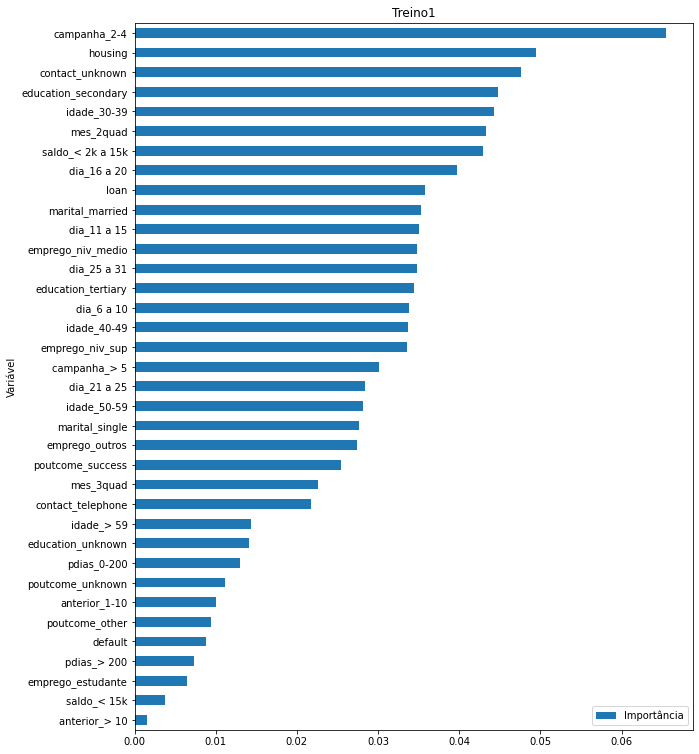

In [ ]:
variaveis.sort_values(by='Importância', ascending=True, inplace=True)
variaveis.set_index('Variável', inplace=True)
variaveis.plot(kind='barh', figsize=(10, 13), title='Treino1');

As quantidades de variáveis serão selecionadas de acordo com a diferença de uma variável com a sua subsequente.

Para o **primeiro** modelo, iremos selecionar **7, 17, 21** e **25** variáveis, o que gerará quatro conjuntos de dados derivados do primeiro modelo (treino1);

In [ ]:
seletor1a = SelectFromModel(modelo1, prefit=True, max_features=7, threshold=-np.inf)
seletor1b = SelectFromModel(modelo1, prefit=True, max_features=17, threshold=-np.inf)
seletor1c = SelectFromModel(modelo1, prefit=True, max_features=21, threshold=-np.inf)
seletor1d = SelectFromModel(modelo1, prefit=True, max_features=25, threshold=-np.inf)

X1a = seletor1a.transform(treino1)
teste1a = seletor1a.transform(teste1)
X1b = seletor1b.transform(treino1)
teste1b = seletor1b.transform(teste1)
X1c = seletor1c.transform(treino1)
teste1c = seletor1c.transform(teste1)
X1d = seletor1d.transform(treino1)
teste1d = seletor1d.transform(teste1)

print(X1a.shape, teste1a.shape)
print(X1b.shape, teste1b.shape)
print(X1c.shape, teste1c.shape)
print(X1d.shape, teste1d.shape)

(6500, 7) (1422, 7)
(6500, 17) (1422, 17)
(6500, 21) (1422, 21)
(6500, 25) (1422, 25)


In [ ]:
modelo2 = modelo_base.fit(treino2, y)

In [ ]:
variaveis = pd.DataFrame()
variaveis['Variável'] = treino2.columns
variaveis['Importância'] = modelo2.feature_importances_
variaveis.sort_values(by='Importância', ascending=False)

,Variável,Importância
9,balance_n,0.181027
8,age_n,0.155723
3,day,0.140165
4,month,0.089838
5,campaign,0.077031
27,contact_unknown,0.038912
6,pdays,0.030774
1,housing,0.027272
29,poutcome_success,0.020628
23,education_secondary,0.020577


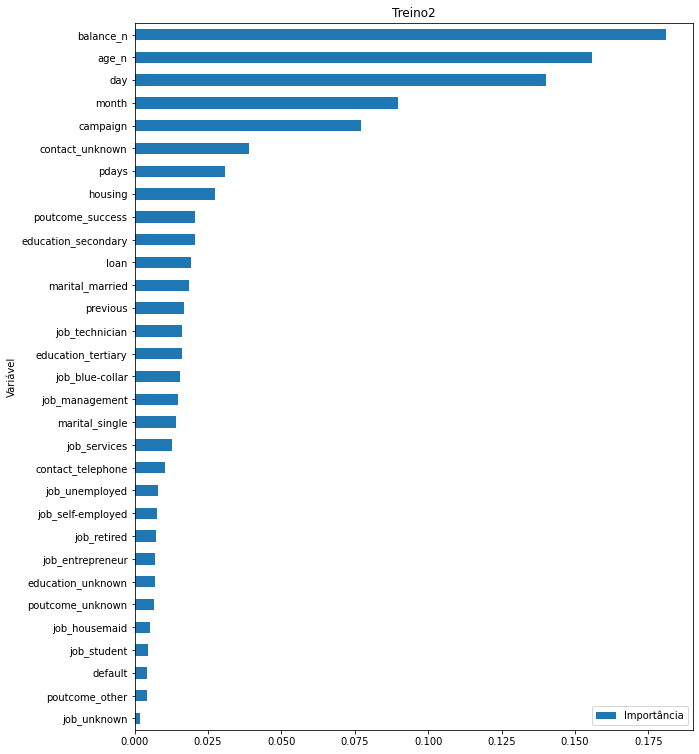

In [ ]:
variaveis.sort_values(by='Importância', ascending=True, inplace=True)
variaveis.set_index('Variável', inplace=True)
variaveis.plot(kind='barh', figsize=(10, 13), title='Treino2');

Para o **segundo** modelo, iremos selecionar **3, 5, 8** e **9 variáveis** variáveis, o que gerará quatro conjuntos de dados derivados do segundo modelo (treino2);

In [ ]:
seletor2a = SelectFromModel(modelo2, prefit=True, max_features=3, threshold=-np.inf)
seletor2b = SelectFromModel(modelo2, prefit=True, max_features=5, threshold=-np.inf)
seletor2c = SelectFromModel(modelo2, prefit=True, max_features=8, threshold=-np.inf)
seletor2d = SelectFromModel(modelo2, prefit=True, max_features=9, threshold=-np.inf)

X2a = seletor2a.transform(treino2)
teste2a = seletor2a.transform(teste2)
X2b = seletor2b.transform(treino2)
teste2b = seletor2b.transform(teste2)
X2c = seletor2c.transform(treino2)
teste2c = seletor2c.transform(teste2)
X2d = seletor2d.transform(treino2)
teste2d = seletor2d.transform(teste2)

print(X2a.shape, teste2a.shape)
print(X2b.shape, teste2b.shape)
print(X2c.shape, teste2c.shape)
print(X2d.shape, teste2d.shape)

(6500, 3) (1422, 3)
(6500, 5) (1422, 5)
(6500, 8) (1422, 8)
(6500, 9) (1422, 9)


In [ ]:
modelo3 = modelo_base.fit(treino3, y)

In [ ]:
variaveis = pd.DataFrame()
variaveis['Variável'] = treino3.columns
variaveis['Importância'] = modelo3.feature_importances_
variaveis.sort_values(by='Importância', ascending=False)

,Variável,Importância
4,balance_n,0.243745
3,age_n,0.208945
11,contact_unknown,0.039236
1,housing,0.032861
26,campanha_2-4,0.032613
20,mes_2quad,0.029585
17,dia_16 a 20,0.027642
7,education_secondary,0.027242
2,loan,0.023926
5,marital_married,0.023599


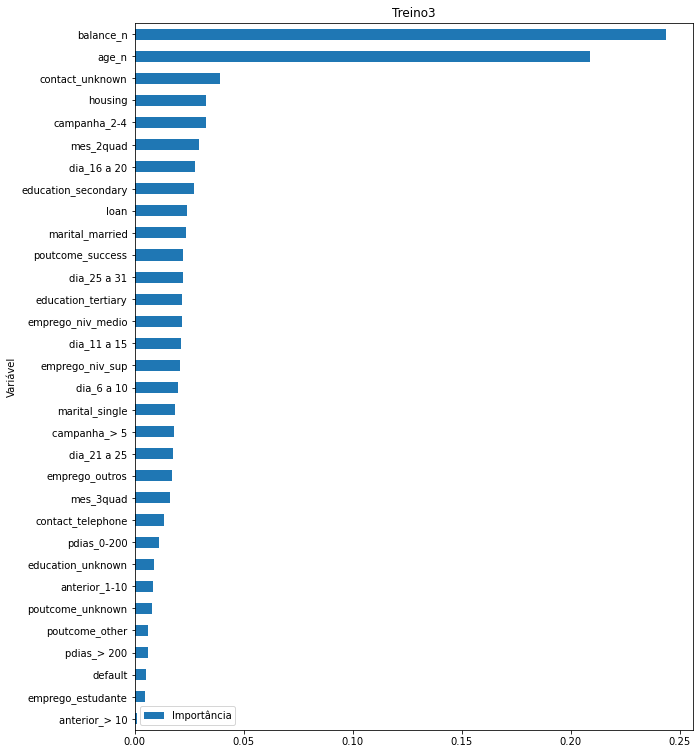

In [ ]:
variaveis.sort_values(by='Importância', ascending=True, inplace=True)
variaveis.set_index('Variável', inplace=True)
variaveis.plot(kind='barh', figsize=(10, 13), title='Treino3');

Para o **terceiro** modelo, iremos selecionar **1, 2, 4** e **5** variáveis, o que gerará quatro conjuntos de dados derivados do terceiro modelo (treino3);

In [ ]:
seletor3a = SelectFromModel(modelo3, prefit=True, max_features=1, threshold=-np.inf)
seletor3b = SelectFromModel(modelo3, prefit=True, max_features=2, threshold=-np.inf)
seletor3c = SelectFromModel(modelo3, prefit=True, max_features=4, threshold=-np.inf)
seletor3d = SelectFromModel(modelo3, prefit=True, max_features=5, threshold=-np.inf)

X3a = seletor3a.transform(treino3)
teste3a = seletor3a.transform(teste3)
X3b = seletor3b.transform(treino3)
teste3b = seletor3b.transform(teste3)
X3c = seletor3c.transform(treino3)
teste3c = seletor3c.transform(teste3)
X3d = seletor3d.transform(treino3)
teste3d = seletor3d.transform(teste3)

print(X3a.shape, teste3a.shape)
print(X3b.shape, teste3b.shape)
print(X3c.shape, teste3c.shape)
print(X3d.shape, teste3d.shape)

(6500, 1) (1422, 1)
(6500, 2) (1422, 2)
(6500, 4) (1422, 4)
(6500, 5) (1422, 5)


In [ ]:
todos_cjtos_treino = [X1a, X1b, X1c, X1d, X2a, X2b, X2c, X2d, X3a, X3b, X3c, X3d]
todos_cjtos_teste = [teste1a, teste1b, teste1c, teste1d, teste2a, teste2b, teste2c, teste2d, teste3a, teste3b, teste3c, teste3d]
nomes_cjtos = ['X1a', 'X1b', 'X1c', 'X1d', 'X2a', 'X2b', 'X2c', 'X2d', 'X3a', 'X3b', 'X3c', 'X3d']

## **Machine Learning**

Com os conjuntos de dados devidamente tratados, iremos aplicar os modelos de Machine Learning para prever se o cliente abrirá um *term deposit* ou não. 

Uma vez que a variável resposta é binária, utilizaremos modelos de classificação para predição. Os modelos utilizados serão Regressão Logística, KNN, Árvore de Decisão, Bagging e Random Forest.

Para cada conjunto, iremos realizar a "tunagem de hiperparâmetros", isto é, testar os conjuntos com diversos valores de parâmetros a fim encontrar o que melhor performa em cada conjunto, e em cada modelo.

Iniciaremos importando as bibliotecas necessárias:

In [ ]:
#importação das bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn. model_selection import GridSearchCV

### **Validação cruzada**

É uma técnica utilizada para avaliar a capacidade de generalização de um modelo, ou seja, sua capacidade de predição em dados novos. Nela, divide-se o conjunto de dados teste em subconjuntos, utilizando alguns destes para estimar os parâmetros do modelo, e outros para validá-los.

Utilizaremos como método de validação o ***Repeated Stratified K-fold***, que divide o conjunto de dados teste em *k* subconjuntos de mesmo tamanho, onde *k-1* subconjuntos são utilizados para estimativa dos parâmetros, e o restante, para testá-los, sucessivamente *k* vezes, conforme mostra a figura abaixo:

> **com k = 5**

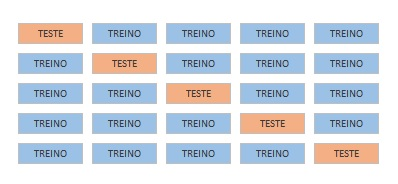

O ***stratified*** proporciona uniformidade nos subconjuntos.

Por fim, esse método será repetido ***n*** vezes.

In [ ]:
valid_kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)

**Métrica**

Para esse conjunto, iremos trabalhar com a métrica ***F1-Score***, que é uma métrica onde falsos positivos e falsos negativos são ponderados.

### **Regressão Logística**

É um modelo estatístico que utiliza uma função logística para prever uma variável binária, a partir das variáveis dependentes.

Não iremos ajustar hiperparâmetros, apenas configurar o número de iterações.


In [ ]:
metrica_rl = []

modelo_rl = LogisticRegression(max_iter=10000)
for i in range(len(todos_cjtos_treino)):
  metricas = cross_validate(modelo_rl, todos_cjtos_treino[i], y, cv=valid_kf, scoring=['f1'])
  metrica_rl.append(round(metricas['test_f1'].mean(), 3))

Verificando o valor da métrica ***F1 Score*** para cada conjunto de dados

In [ ]:
results_rl = pd.DataFrame(metrica_rl, index=nomes_cjtos, columns=['RL'])
results_rl.sort_values(by='RL', ascending=False)

,RL
X2c,0.657
X1c,0.650
X1b,0.648
X2d,0.647
X1d,0.645
X1a,0.640
X3d,0.639
X3c,0.617
X2b,0.562
X2a,0.505


### **KNN - K Nearest Neighbors**

KNN é um modelo que utiliza os *K* vizinhos mais próximos realizar a predição.

O hiperparâmetro a ser ajustado será o número de vizinhos. Utilizaremos o intervalo de valores entre 1 e 50, com 2 de "passo": **1, 3, 5, 7..47, 49**.

In [ ]:
param_knn = {'n_neighbors': np.arange(1, 50, 2)}
metrica_knn = []
lista_param_knn = []

for i in range(len(todos_cjtos_treino)):
  clf = GridSearchCV(KNeighborsClassifier(), param_knn, cv=valid_kf, scoring='f1', n_jobs=-1)
  clf.fit(todos_cjtos_treino[i], y)
  viz = clf.best_params_
  modelo_knn = KNeighborsClassifier(viz['n_neighbors'])
  lista_param_knn.append(viz['n_neighbors'])
  metricas = cross_validate(modelo_knn, todos_cjtos_treino[i], y, cv=valid_kf, scoring=['f1'])
  metrica_knn.append(round(metricas['test_f1'].mean(), 3))

In [ ]:
dicio_knn = {'KNN' : metrica_knn, 'Neigh' : lista_param_knn}

Verificando o valor da métrica ***F1 Score***  e o melhor parâmetro para cada conjunto de dados

In [ ]:
results_knn = pd.DataFrame(dicio_knn, index=nomes_cjtos)
results_knn.sort_values(by='KNN', ascending=False)

,KNN,Neigh
X1c,0.644,49
X1d,0.639,49
X1b,0.633,45
X2c,0.631,3
X2d,0.628,3
X2b,0.614,5
X3d,0.610,21
X1a,0.608,47
X3c,0.607,43
X2a,0.569,35


### **Árvore de decisão**

É um modelo em que os dados são sucessivamente divididos de acordo com os parâmetros.

Ajustaremos o hiperparâmetro *max depth*, que é a quantidade de divisões que o modelo irá realizar.

In [ ]:
param_arv = {'max_depth': np.arange(2, 25, 1)}
metrica_arv = []
lista_param_arv = []

for i in range(len(todos_cjtos_treino)):
  clf = GridSearchCV(DecisionTreeClassifier(), param_arv, cv=valid_kf, scoring='f1', n_jobs=-1)
  clf.fit(todos_cjtos_treino[i], y)
  dep = clf.best_params_
  lista_param_arv.append(dep['max_depth'])
  modelo_arv = DecisionTreeClassifier(max_depth=dep['max_depth'])
  metricas = cross_validate(modelo_arv, todos_cjtos_treino[i], y, cv=valid_kf, scoring=['f1'])
  metrica_arv.append(round(metricas['test_f1'].mean(), 3))

In [ ]:
dicio_arv = {'ARV' : metrica_arv, 'Depth' : lista_param_arv}

Verificando o valor da métrica ***F1 Score*** e o melhor parâmetro para cada conjunto de dados.

In [ ]:
results_arv = pd.DataFrame(dicio_arv, index=nomes_cjtos)
results_arv.sort_values(by='ARV', ascending=False)

,ARV,Depth
X1d,0.686,2
X2d,0.686,2
X1b,0.660,3
X1c,0.651,6
X2c,0.618,9
X3d,0.617,2
X3c,0.616,2
X1a,0.613,3
X2b,0.591,21
X3b,0.586,2


### **Bagging**

Bagging, ou Bootstrap aggregating é um algoritimo que combina vários modelos para realizar a sua predição, utilizando um outro modelo como base.

Neste modelo, utilizaremos como base o modelo Árvore de Decisão. Os hiperparâmetros a serem ajustados serão: A profundidade do modelo base (*base_estimator__max_depth*), *n_estimators*, *max_features* e *bootstrap*.

In [ ]:
param_bag = {'base_estimator__max_depth' : [1, 2, 3],
              'n_estimators': [50, 100, 150],
              'max_features': [1, 2, 4],
              'bootstrap': [True, False]}
metrica_bag = []
lista_param_bag1 = []
lista_param_bag2 = []
lista_param_bag3 = []
lista_param_bag4 = []

for i in range(len(todos_cjtos_treino)):
  clf = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_bag, cv=valid_kf, scoring='f1', n_iter=50, n_jobs=-1)
  clf.fit(todos_cjtos_treino[i], y)
  dep = clf.best_params_
  modelo_bag = BaggingClassifier(n_estimators=dep['n_estimators'], base_estimator=DecisionTreeClassifier(max_depth=dep['base_estimator__max_depth']), bootstrap=dep['bootstrap'], max_features=dep['max_features'])
  lista_param_bag1.append(dep['base_estimator__max_depth'])
  lista_param_bag2.append(dep['n_estimators'])
  lista_param_bag3.append(dep['max_features'])
  lista_param_bag4.append(dep['bootstrap'])
  metricas = cross_validate(modelo_bag, todos_cjtos_treino[i], y, cv=valid_kf, scoring=['f1'])
  metrica_bag.append(round(metricas['test_f1'].mean(), 3))

In [ ]:
dicio_bag = {'BAG' : metrica_bag, 'Depth' : lista_param_bag1, 'Est' : lista_param_bag2, 'Feat' : lista_param_bag3, 'Boot' : lista_param_bag4}

Verificando o valor da métrica ***F1 Score*** e os melhores parâmetros para cada conjunto de dados.

In [ ]:
results_bag = pd.DataFrame(dicio_bag, index=nomes_cjtos)
results_bag.sort_values(by='BAG', ascending=False)

,BAG,Depth,Est,Feat,Boot
X3c,0.684,1,150,4,False
X3d,0.684,1,100,4,True
X2c,0.678,1,150,4,True
X2d,0.674,1,150,4,False
X1a,0.665,1,100,4,True
X1c,0.641,2,100,4,True
X1b,0.633,1,100,4,True
X1d,0.632,3,150,4,False
X3b,0.587,2,100,2,False
X2b,0.586,3,100,1,True


### **Random Forest**

É um algoritimo que utiliza combinação de várias árvores de decisão para realizar sua predição.

Neste modelo, os hiperparâmetros a serem ajustados serão: *max_depth*, *n_estimators*, *max_features* e *bootstrap*.

In [ ]:
param_ran = {'max_depth' : [2, 6, 10],
              'n_estimators': [50, 100, 150],
              'max_features': ['sqrt', 'auto', 'log2'],
              'bootstrap': [True, False]}
metrica_ran = []
lista_param_ran1 = []
lista_param_ran2 = []
lista_param_ran3 = []
lista_param_ran4 = []

for i in range(len(todos_cjtos_treino)):
  clf = RandomizedSearchCV(RandomForestClassifier(), param_ran, cv=valid_kf, scoring='f1', n_iter=50, n_jobs=-1)
  clf.fit(todos_cjtos_treino[i], y)
  dep = clf.best_params_
  modelo_ran = RandomForestClassifier(n_estimators=dep['n_estimators'], max_depth=dep['max_depth'], max_features=dep['max_features'], bootstrap=dep['bootstrap'])
  lista_param_ran1.append(dep['max_depth'])
  lista_param_ran2.append(dep['n_estimators'])
  lista_param_ran3.append(dep['max_features'])
  lista_param_ran4.append(dep['bootstrap'])
  metricas = cross_validate(modelo_ran, todos_cjtos_treino[i], y, cv=valid_kf, scoring=['f1'])
  metrica_ran.append(round(metricas['test_f1'].mean(), 3))

In [ ]:
dicio_ran = {'RAN' : metrica_ran, 'Depth' : lista_param_ran1, 'Est' : lista_param_ran2, 'Feat' : lista_param_ran3, 'Boot' : lista_param_ran4}

Verificando o valor da métrica ***F1 Score*** para cada conjunto de dados

In [ ]:
results_ran = pd.DataFrame(dicio_ran, index=nomes_cjtos)
results_ran.sort_values(by='RAN', ascending=False)

,RAN,Depth,Est,Feat,Boot
X2c,0.663,10,100,log2,True
X1c,0.659,6,150,auto,False
X1d,0.659,10,100,auto,True
X2d,0.659,10,100,log2,True
X1b,0.652,6,50,auto,False
X3c,0.643,2,100,auto,True
X3d,0.640,2,100,sqrt,True
X1a,0.633,2,150,auto,False
X2b,0.616,10,50,sqrt,True
X2a,0.576,6,50,auto,True


In [ ]:
resultados = pd.concat([results_rl, results_knn['KNN'], results_arv['ARV'], results_bag['BAG'], results_ran['RAN']], axis=1)

In [ ]:
from google.colab import data_table
data_table.DataTable(resultados)

,RL,KNN,ARV,BAG,RAN
X1a,0.640,0.608,0.613,0.665,0.633
X1b,0.648,0.633,0.660,0.633,0.652
X1c,0.650,0.644,0.651,0.641,0.659
X1d,0.645,0.639,0.686,0.632,0.659
X2a,0.505,0.569,0.582,0.562,0.576
X2b,0.562,0.614,0.591,0.586,0.616
X2c,0.657,0.631,0.618,0.678,0.663
X2d,0.647,0.628,0.686,0.674,0.659
X3a,0.387,0.539,0.515,0.535,0.542
X3b,0.411,0.546,0.586,0.587,0.564


## **Conclusão**

As combinações do conjunto **X2d** e do algorítimo **Árvore de Decisão** e **X1d** e do algorítimo **Árvore de Decisão** foram os mais eficazes para predição desejada, e que as variáveis idade, dia, mês, saldo bancário e campanha estão presentes entre as mais relevantes para ambos os conjuntos.

**Ações a serem tomadas para próximas campanhas**

Na análise exploratória de dados, verificamos que o mês de maio foi o mais intenso em relação à campanha. Contudo, foi também o mês menos eficiente. Os meses mais positivos foram de janeiro a abril e de setembro a dezembro. Em relação aos dias, verificamos que a primeira quinzena tende a ser mais positiva que a segunda. Podemos combinar dias e meses que foram mais efetivos e concentrar a campanha nesses períodos.

Vimos também que os mais jovens e mais velhos têm a taxa de abertura maior que outras faixas etárias, o que indica ter relação com a ocupação desses clientes, uma vez que a taxa de abertura foi maior, proporcionalmente, entre estudantes e aposentados, indicando maior sucesso de campanhas com estes grupos de clientes.